In [2]:
# from google.colab import drive
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

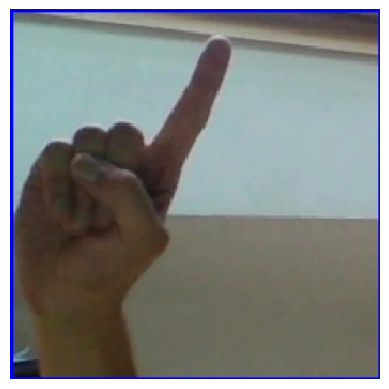

Predicted Class: L


In [29]:
# interpreter = tf.lite.Interpreter(model_path="../tflite_model/Model_SignLang.tflite")
interpreter = tf.lite.Interpreter(model_path="../model.tflite")
interpreter.allocate_tensors()

# Dapatkan input dan output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load dan preprocess gambar
file_path = "../dataset/test/Z_test.jpg"  
labels = ['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

img = image.load_img(file_path, target_size=(224, 224))  # Sesuaikan ukuran input model kamu
plt.imshow(img)
plt.axis('off')
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x.astype(np.float32) / 255.0  # Normalisasi

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], x)

# Jalankan inference
interpreter.invoke()

# Ambil hasil output
output_data = interpreter.get_tensor(output_details[0]['index'])

predicted_class = np.argmax(output_data)
print(f"Predicted Class: {labels[predicted_class]}")